# COMPARATIVE ANALYSIS BETWEEN THE LOGISTIC REGRESSION MODEL AND THE MULTILAYER PERCEPTRON NEURAL NETWORK FOR CUSTOMER LOAN ELIGIBILITY CLASSIFICATION.

### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd # Importing pandas library and aliasing it as pd
import numpy as np # Importing numpy library and aliasing it as np
import time # tracks time for a certain operation
import psutil # tracks cpu usage
import threading # allows continous monitoring
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt # Importing pyplot module from matplotlib library and aliasing it as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns # Importing seaborn library and aliasing it as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve, auc, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)   # Setting pandas option to display all columns in DataFrame
plt.style.use('ggplot')  # Setting plot style to 'ggplot' from matplotlib

In [2]:
# Reading data from 'Loan payments data' into data DataFrame
data = pd.read_csv("C:/Users/Hp/Documents/loan/Loan payments data.csv")

In [3]:
# Displaying the DataFrame
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


### DATA PREPROCESSING

##### LOOKING AT THE UNIQUE VALUES TO KNOW WHICH IS IMPORTANT IN THE PREDICTIVE MODELLING

In [4]:
print(f"Number of Unique IDS: {data['loan_status'].unique()}")

Number of Unique IDS: ['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


In [5]:
print(f"Number of Unique IDS: {data['Principal'].unique()}")

Number of Unique IDS: [1000  300  800  900  700  500]


In [6]:
print(f"Number of Unique IDS: {data['past_due_days'].unique()}")

Number of Unique IDS: [nan 76. 61. 75. 60. 59. 74. 29. 44. 58. 73. 28.  2.  4. 13.  5.  3. 12.
 27.  1. 25. 24. 36.  7. 14. 23.  6. 38. 19. 52. 51.  9. 56.  8.]


In [7]:
print(f"Number of Unique IDS: {data['education'].unique()}")

Number of Unique IDS: ['High School or Below' 'Bechalor' 'college' 'Master or Above']


#### DROP REDUNDANT COLUMNS

In [8]:
# list of columns to drop
COLUMNS_TO_DROP = ["Loan_ID", "effective_date", "due_date", "paid_off_time"]

In [9]:
# Drop columns
data = data.drop(COLUMNS_TO_DROP, axis=1)

In [10]:
# looking at new dataframe
data.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,NaN,50,Bechalor,female
2,PAIDOFF,1000,30,NaN,33,Bechalor,female
3,PAIDOFF,1000,15,NaN,27,college,male
4,PAIDOFF,1000,30,NaN,28,college,female


In [11]:
# dropping the class label, collection, as it does not tell any story on the loan 
class_to_drop = 'COLLECTION'

In [12]:
# separating the rows from the dataset where the class label is not "collection"
data = data[data['loan_status'] != class_to_drop]

## EXPLORATORY DATA ANALYSIS

#### EDUCATION AND LOAN STATUS RELATIONSHIP

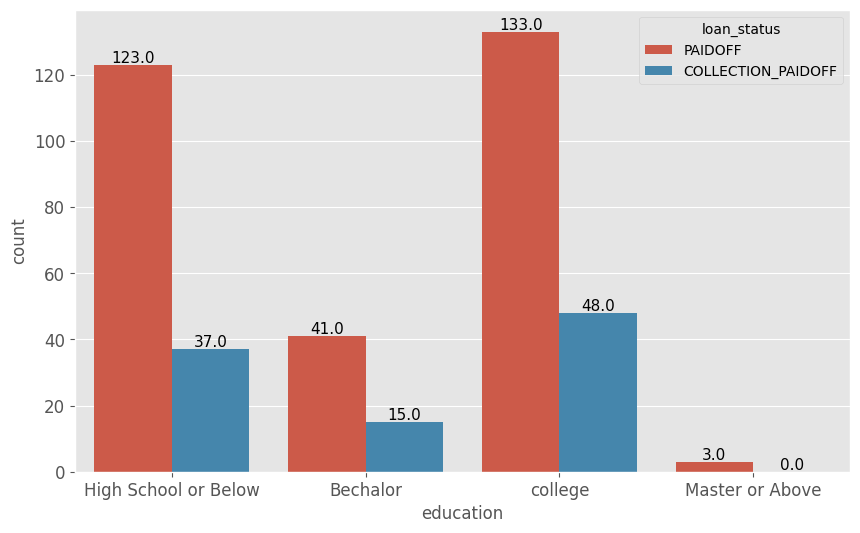

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="education", hue="loan_status", data=data)
for i in ax.patches:
    ax.annotate(f"{i.get_height()}", (i.get_x() + i.get_width() / 2., i.get_height()), ha="center", va="center", fontsize=11,
    color = "black", xytext = (0, 5), textcoords = "offset points")
    ax.tick_params(axis="both", which="major", labelsize=12)
plt.show()

#### GENDER AND LOAN STATUS RELATIONSHIP

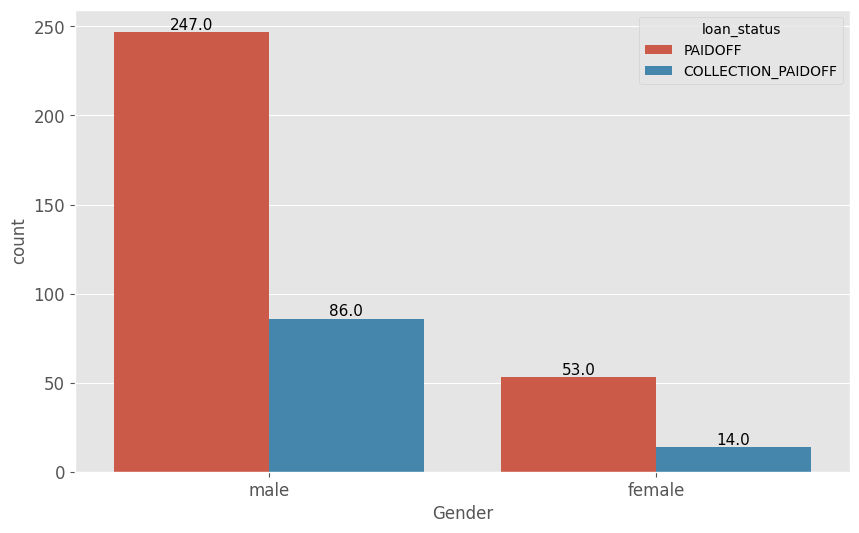

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Gender", hue="loan_status", data=data)
for i in ax.patches:
    ax.annotate(f"{i.get_height()}", (i.get_x() + i.get_width() / 2., i.get_height()), ha="center", va="center", fontsize=11,
    color = "black", xytext = (0, 5), textcoords = "offset points")
    ax.tick_params(axis="both", which="major", labelsize=12)
plt.show()

#### AGE AND LOAN STATUS RELATIONSHIP

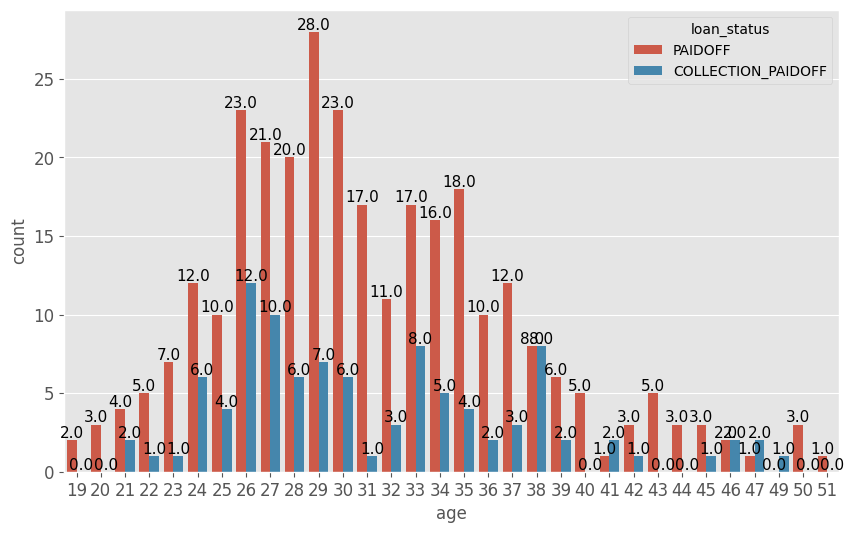

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="age", hue="loan_status", data=data)
for i in ax.patches:
    ax.annotate(f"{i.get_height()}", (i.get_x() + i.get_width() / 2., i.get_height()), ha="center", va="center", fontsize=11,
    color = "black", xytext = (0, 5), textcoords = "offset points")
    ax.tick_params(axis="both", which="major", labelsize=12)
plt.show()

#### EDUCATION AND GENDER RELATIONSHIP

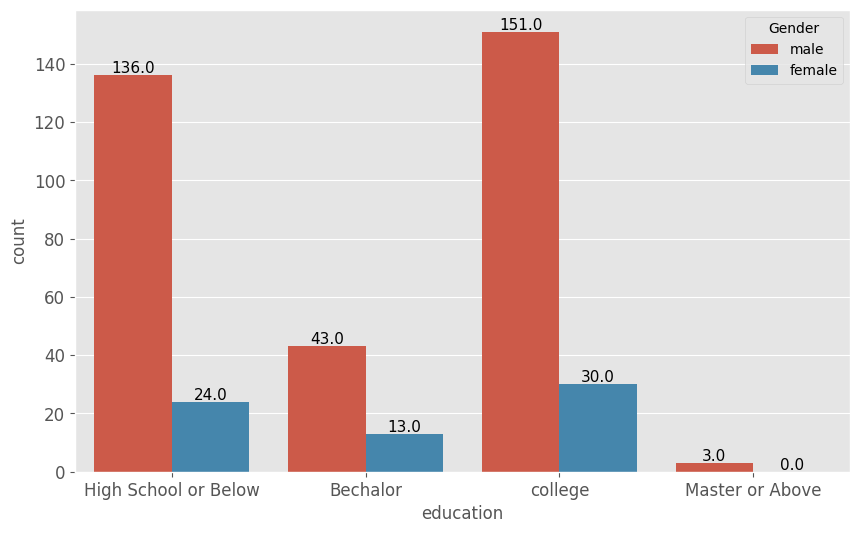

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="education", hue="Gender", data=data)
for i in ax.patches:
    ax.annotate(f"{i.get_height()}", (i.get_x() + i.get_width() / 2., i.get_height()), ha="center", va="center", fontsize=11,
    color = "black", xytext = (0, 5), textcoords = "offset points")
    ax.tick_params(axis="both", which="major", labelsize=12)
plt.show()

#### PRINCIPAL AND LOAN STATUS RELATIONSHIP

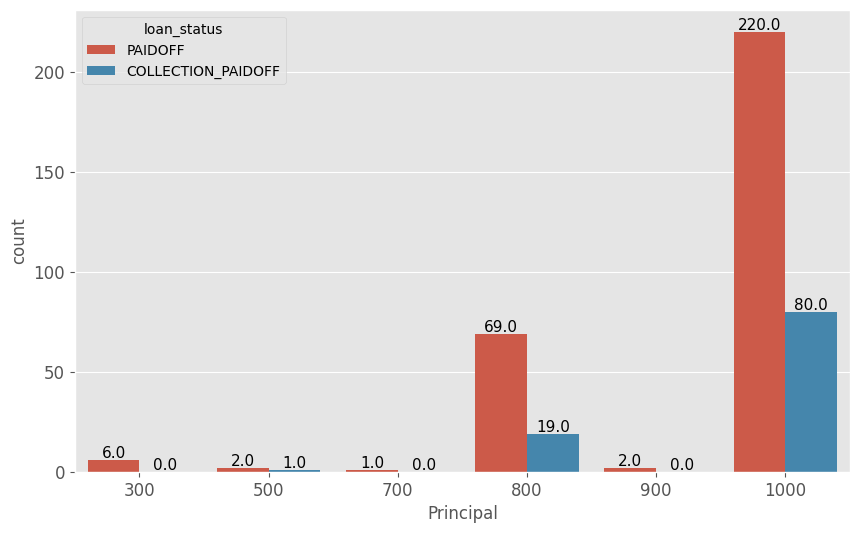

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Principal", hue="loan_status", data=data)
for i in ax.patches:
    ax.annotate(f"{i.get_height()}", (i.get_x() + i.get_width() / 2., i.get_height()), ha="center", va="center", fontsize=11,
    color = "black", xytext = (0, 5), textcoords = "offset points")
    ax.tick_params(axis="both", which="major", labelsize=12)
plt.show()

#### AGE AND GENDER RELATIONSHIP

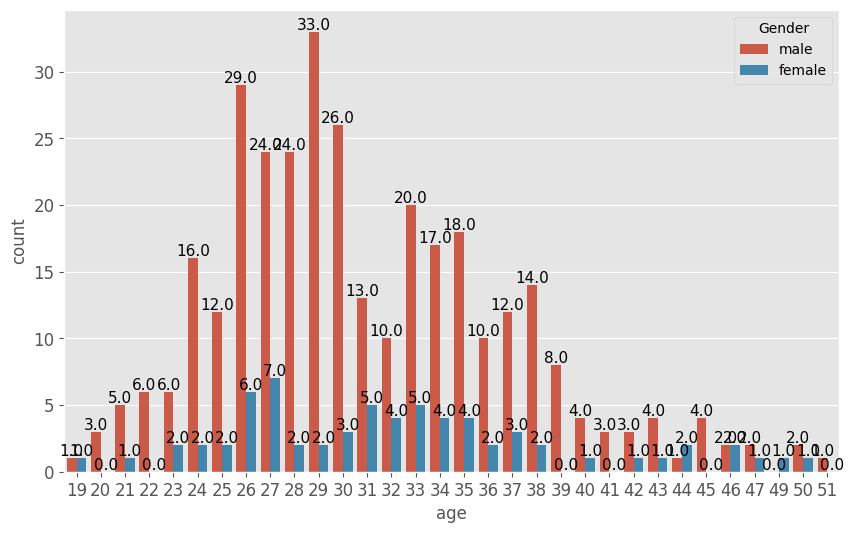

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="age", hue="Gender", data=data)
for i in ax.patches:
    ax.annotate(f"{i.get_height()}", (i.get_x() + i.get_width() / 2., i.get_height()), ha="center", va="center", fontsize=11,
    color = "black", xytext = (0, 5), textcoords = "offset points")
    ax.tick_params(axis="both", which="major", labelsize=12)
plt.show()

#### LABEL ENCODER

In [19]:
# initializing the label encoder
encoder = LabelEncoder()

In [20]:
# This code encodes the features which are not numerical, for the machine learning model.
data["loan_status"] = encoder.fit_transform(data["loan_status"])
data["education"] = encoder.fit_transform(data["education"])
data["Gender"] = encoder.fit_transform(data["Gender"])

#### CHECKING FOR MISSING VALUES

In [21]:
# Counting missing values in each column
missing_values_count = data.isnull().sum()

# Calculating the proportion of missing values for each column
missing_values_proportion= data.isnull().sum() / len(data)

# Combining count and proportion into one DataFrame for a clean summary
missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Proportion': missing_values_proportion
})
# Displaying the summary table
print(missing_values_summary)

               Missing Values  Proportion
loan_status                 0        0.00
Principal                   0        0.00
terms                       0        0.00
past_due_days             300        0.75
age                         0        0.00
education                   0        0.00
Gender                      0        0.00


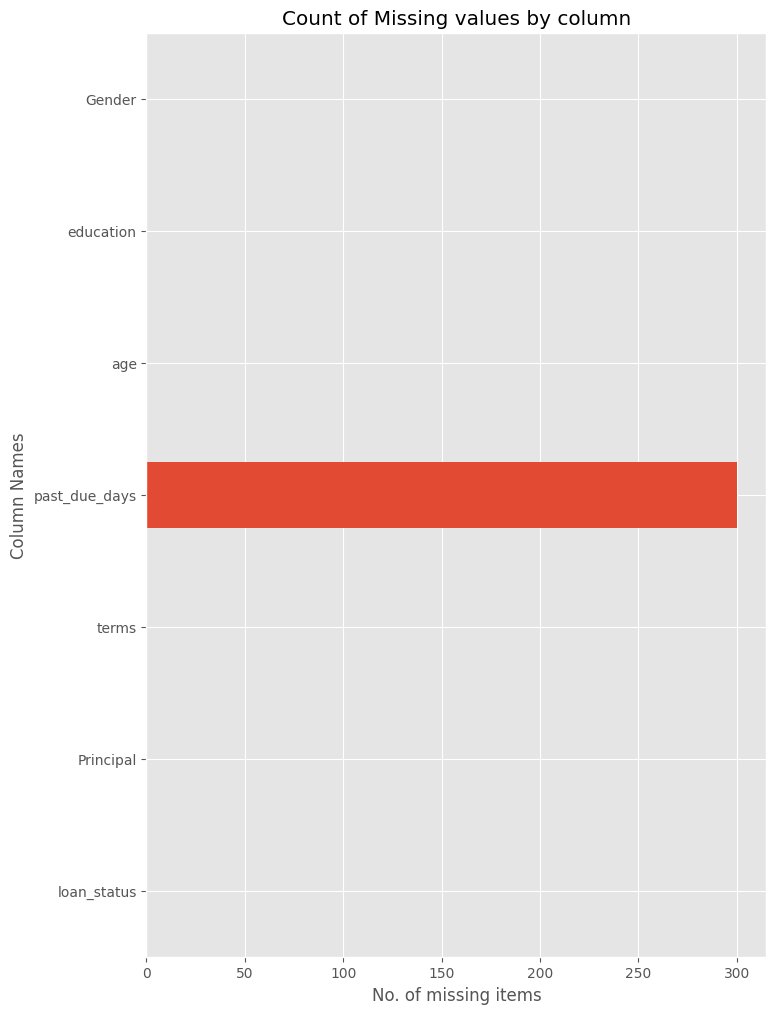

In [22]:
# Check for missing values and plot the count of missing values by column
data.isnull().sum().plot(kind='barh', figsize=(8, 12))

# Set the title of the plot
plt.title('Count of Missing values by column')
plt.xlabel('No. of missing items')
plt.ylabel('Column Names')

# Show the plot
plt.show()

In [23]:
# fill the missing values with 0
data = data.fillna(0)

In [24]:
# Counting missing values in each column
missing_values_count = data.isnull().sum()

# Calculating the proportion of missing values for each column
missing_values_proportion= data.isnull().sum() / len(data)

# Combining count and proportion into one DataFrame for a clean summary
missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Proportion': missing_values_proportion
})
# Displaying the summary table
print(missing_values_summary)

               Missing Values  Proportion
loan_status                 0         0.0
Principal                   0         0.0
terms                       0         0.0
past_due_days               0         0.0
age                         0         0.0
education                   0         0.0
Gender                      0         0.0


#### CORRELATION MATRIX

In [25]:
# initialize the correlation matrix
corr = data.corr()

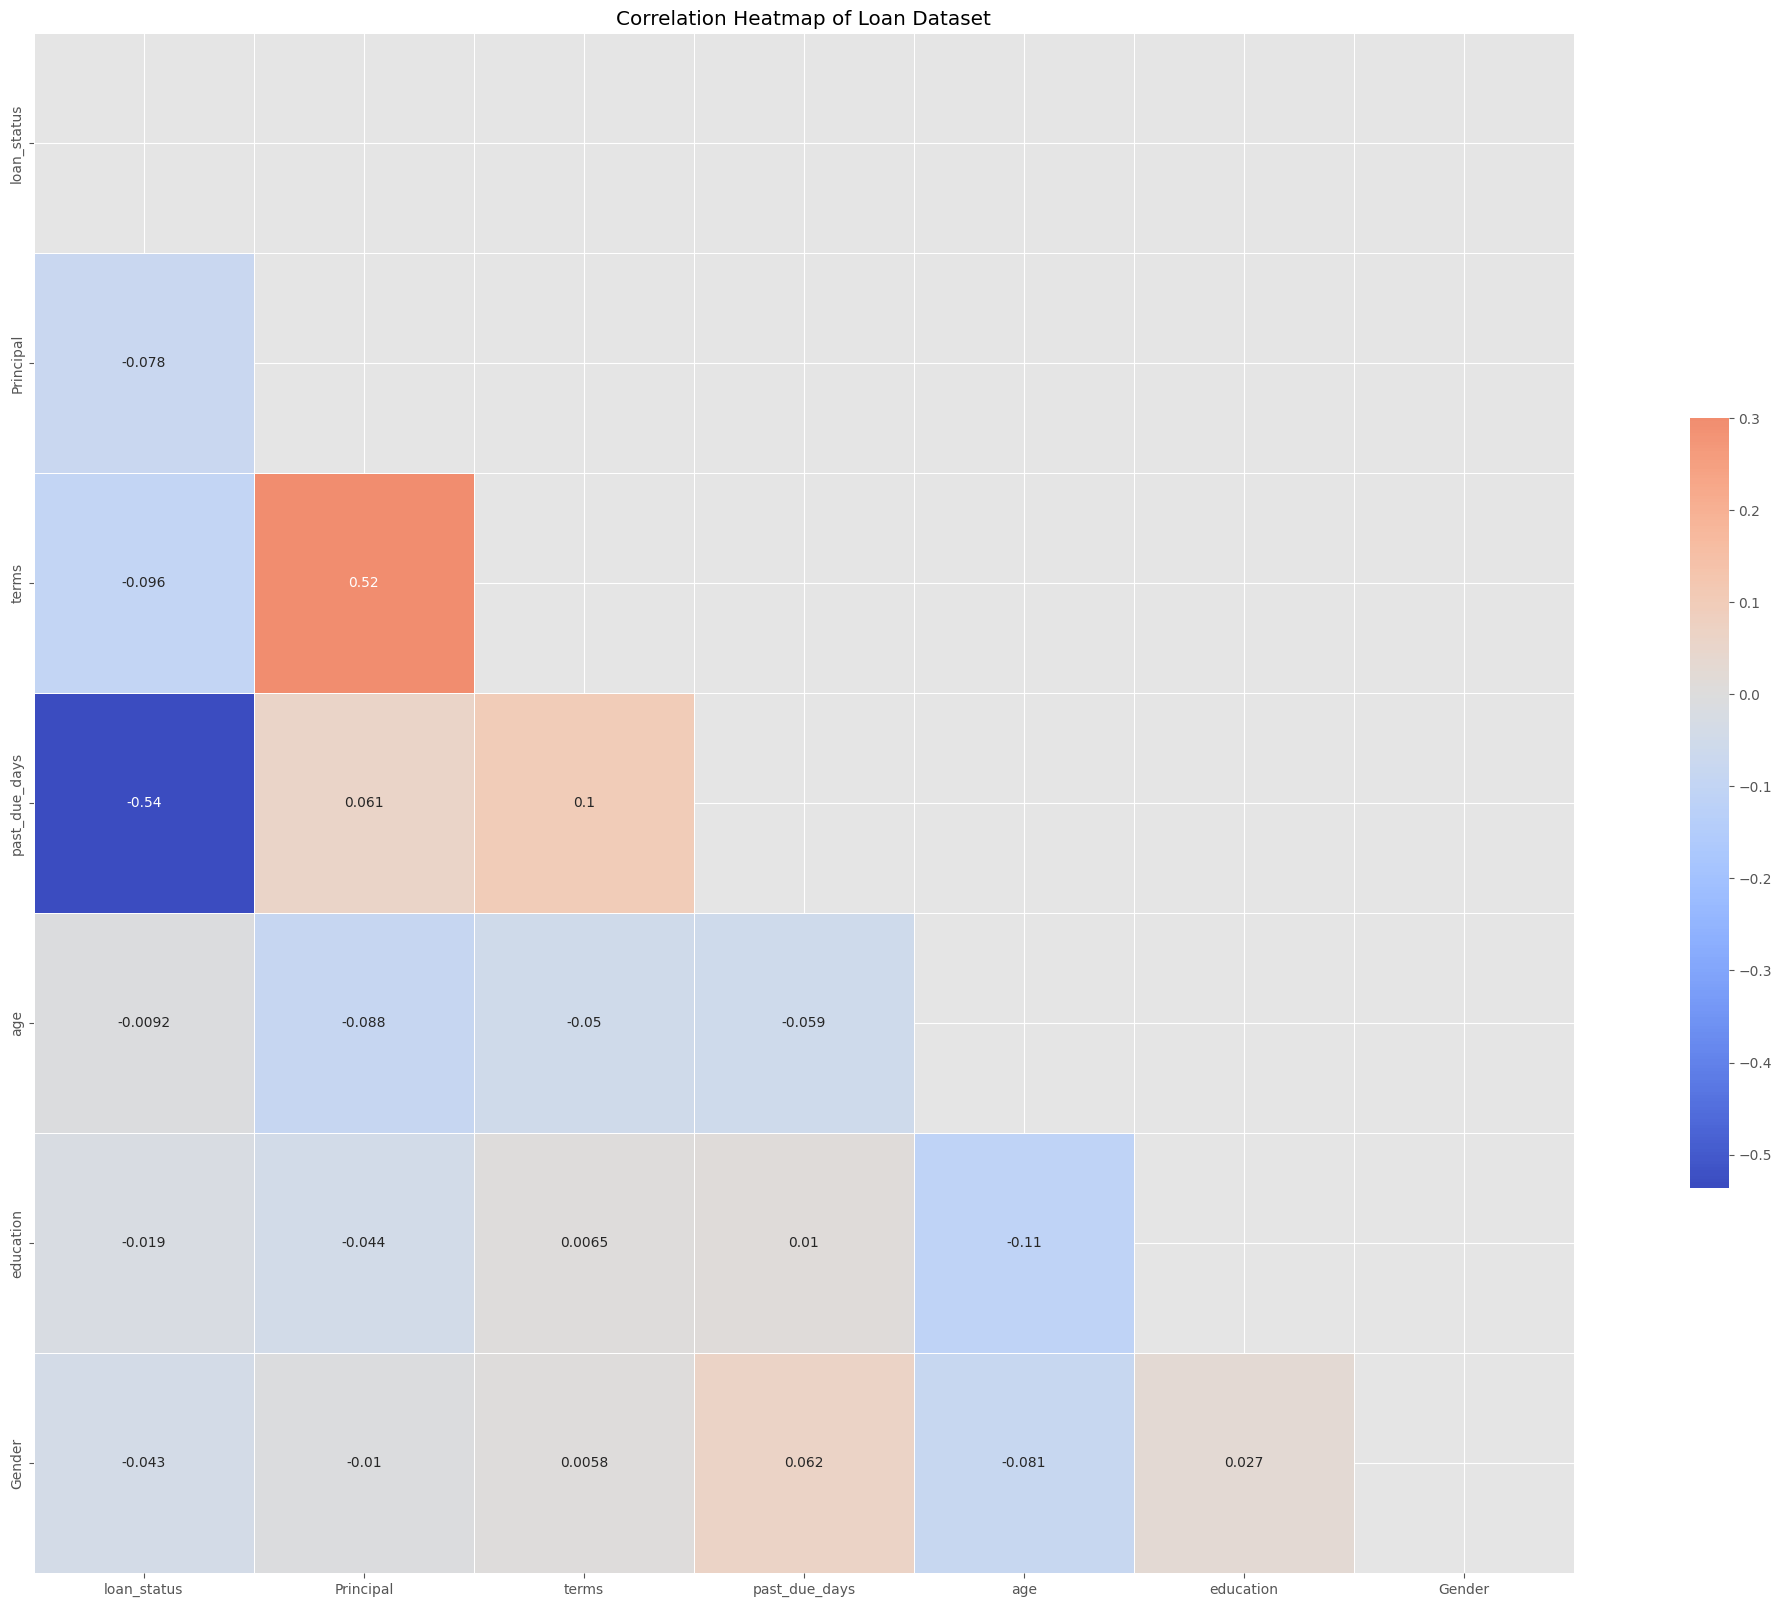

In [26]:
# Create heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr, mask=mask, vmax=0.3, center=0, square=True, linewidths=0.5,cbar_kws={"shrink":0.5}, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Loan Dataset")
plt.show()

#### VISUALIZING THE LABEL COUNTS

In [27]:
# initialize the value counts of the labels
label_counts = data["loan_status"].value_counts()

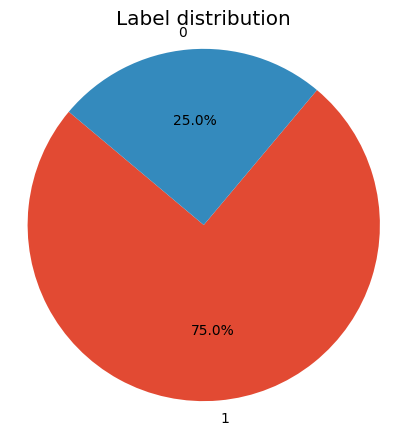

In [28]:
# create plot
plt.figure(figsize=(5,5))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Label distribution")
plt.axis("equal")
plt.show()

### DATA SPLITTING AND NORMALIZATION

In machine learning, data can be inputed in several magnitudes and sometimes it may hinder the model from learning some important data points or features correctly, with such a problem, the need to normalize or standardize our data becomes of utmost importance. Normalization is a technique used to transform the features of a dataset into a common scale, that is to represent the datapoints magnitude within a common range so that the machine learning is not influenced by the disproportional datapoints helping the data to converge faster and perform better.

In [29]:
# splits the data into dependent and independent variables
X = data.drop("loan_status", axis = 1) #independent columns
y = data["loan_status"] #target

num_classes = len(np.unique(y))

# splits the data into train sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=46)

# splits the data into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=46)

# scaling the faetures
scaler = StandardScaler()

# fit the scaler to the train data
X_train = scaler.fit_transform(X_train)

# fit the scaler to the test data
X_test = scaler.transform(X_test)

# fit the scaler to the validation data
X_val = scaler.transform(X_val)

## LOGISTIC REGRESSION

In [30]:
# initialize the logistic regression model
model = LogisticRegression(max_iter=10000)

# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

# fit and train the model
model.fit(X_train, y_train)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [31]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 0.02 seconds
Average CPU usage during training: 0.00%


In [32]:
# evaluate the model predictions
y_pred = model.predict(X_test)

# evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.75%


In [33]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.59      0.74        22
           1       0.87      1.00      0.93        58

    accuracy                           0.89        80
   macro avg       0.93      0.80      0.84        80
weighted avg       0.90      0.89      0.88        80



#### CONFUSION MATRIX

In [34]:
# initialize the class labels
class_labels = ['PAIDOFF', 'COLLECTION_PAIDOFF']

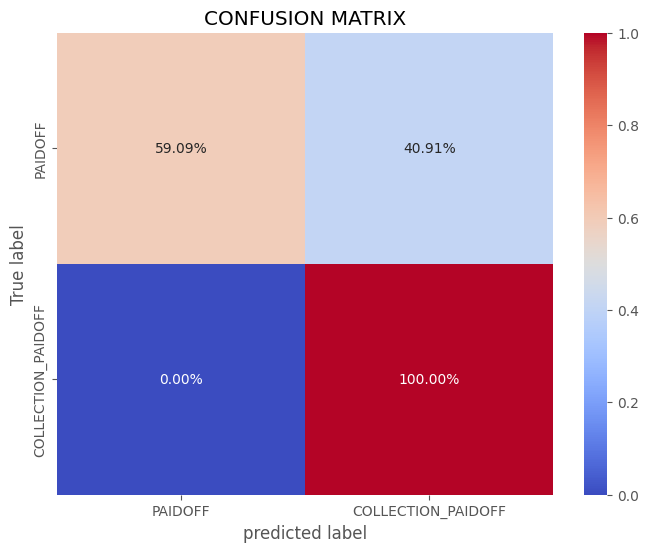

In [35]:
# computes the confusion matrix, which is a table that describes the performance of a classification model.
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
# adjusts the figure size
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="coolwarm", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.ylabel("True label")
plt.xlabel("predicted label")
plt.show()

## MULTILAYER PERCEPTRON

In [36]:
import tensorflow as tf # importing the neural network framework with alias tf
from tensorflow.keras.models import Sequential # activating the linear layers of the neural network
from tensorflow.keras.layers import Dense # activating the dense and fully connected layer of the neural network

In [37]:
# define the neural netwrok model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation = 'relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax') # multi-class classification
])

In [38]:
# model compilation
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [39]:
# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.3284 - loss: 0.7949 - val_accuracy: 0.5125 - val_loss: 0.7256
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5722 - loss: 0.7049 - val_accuracy: 0.6000 - val_loss: 0.6414
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6694 - loss: 0.6244 - val_accuracy: 0.7750 - val_loss: 0.5858
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8543 - loss: 0.5515 - val_accuracy: 0.7875 - val_loss: 0.5471
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8324 - loss: 0.5097 - val_accuracy: 0.7875 - val_loss: 0.5213
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8135 - loss: 0.4891 - val_accuracy: 0.7875 - val_loss: 0.5032
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7893 - loss: 0.4837 - val_accuracy: 0.7875 - val_loss: 0.4875
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8109 - loss: 0.4498 - val_accuracy: 0.8000 - val_loss: 0.4740


In [40]:
# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [41]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 6.89 seconds
Average CPU usage during training: 51.40%


#### VISUALIZE THE TRAIN ACCURACY

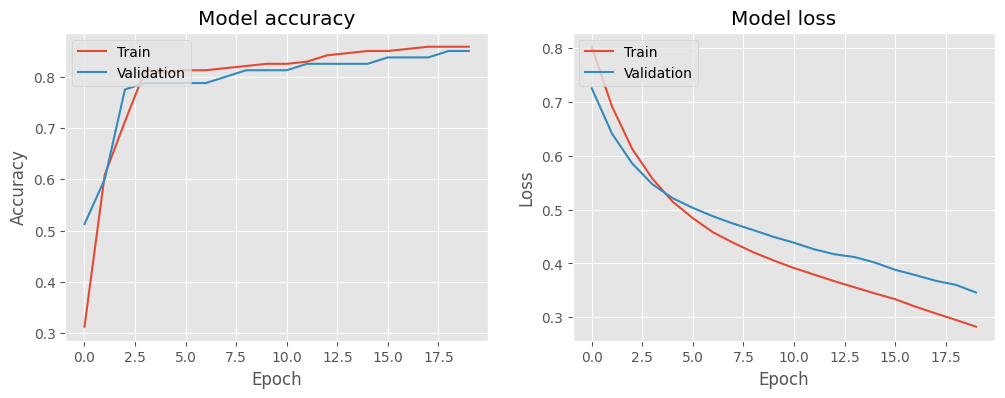

In [42]:
# plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### EVALUATE THE TEST ACCURACY

In [43]:
# Test set evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8586 - loss: 0.3270 


In [44]:
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8500
